# K- Nearest Neighbour - Classification

* We will look more into the significance of K-Value
* How to select K-Value and how it changes the metrics like accuracy,Precision,Recall,F1Score

 *Source:* https://www.youtube.com/watch?v=wTF6vzS9fy4&list=PLZoTAELRMXVPBTrWtJkn3wWQxZkmTXGwe&index=56

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv('ClassifiedData.csv',index_col=0)
data.head()
## It is more of the interest to split the data into Train,valid and test
'''
** Please excuse for the naming conventions used
maindata -> Complete data set (1000 records)
TestData -> Our Test set (150 records)
data -> Train(X_train,y_train) + valid(X_test and y_test) (train - 700 records && test - 150 records)
'''
maindata = data.copy()
testData = maindata.iloc[850:,:].copy()
data = maindata.iloc[:850,:].copy()

In [43]:
## checking the shapes
testData.shape, data.shape

((150, 11), (850, 11))

In [46]:
## setting test_size  which is valid set -> 150 records, converting it to percentage.
TEST_SIZE = 150/850


In [47]:
## the dataset is calculated in different units so we use standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
X= data.drop('TARGET CLASS',axis=1)

In [49]:
## checking the values so as to compare it for later purpose i.e after scaling it.
X.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [50]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [51]:
## transform and save it to X itself, dont forget indexing while assigning inorder to maintain the schema(columns and rows), else it would be an nd-array
X[:] = scaler.transform(X)

In [52]:
X.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.118819,0.160170,-0.919068,0.335129,-1.028269,-2.312574,-0.806912,-1.491967,-0.949130,-0.647197
1,-1.091966,-0.454583,-1.031756,0.642068,-0.437171,-1.157690,-1.140321,-0.207753,-1.824676,0.632067
2,-0.792181,0.313206,0.304614,0.773056,2.049079,-0.875332,2.618185,0.281751,-0.682752,-0.381901
3,1.001206,1.032323,-0.624936,0.641979,0.464016,-0.272805,1.761993,1.065028,1.234966,-1.030628
4,1.159570,-0.664114,-0.713992,-0.043129,0.835533,-0.941904,0.599633,-1.481919,1.035050,0.272046


In [86]:
from sklearn.model_selection import train_test_split

In [54]:
## getting target variable/ just ensuring things are right ** spell checks**
data.columns[-1]

'TARGET CLASS'

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,data['TARGET CLASS'],test_size=TEST_SIZE)

In [57]:
## observing the sahpe of each to see if everything is cooking right
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((700, 10), (150, 10), (700,), (150,))

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
## just for identifying the difference we give K=1 i.e n_neighbours
knn = KNeighborsClassifier(n_neighbors=1)

In [60]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [61]:
y_pred = knn.predict(X_test)

In [65]:
## classification report and Confusion matrix will spit out most of the 
            #info required about the accuracy and metrics related stuffs
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred),"\n\nConfusion matrix: \n",confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        71
           1       0.90      0.90      0.90        79

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150
 

Confusion matrix: 
 [[63  8]
 [ 8 71]]


### Choosing K Value
* We will need to use the optimal value.

**Elbow method**
<img src="https://www.edureka.co/blog/wp-content/uploads/2017/02/Elbow-method.png" width=30% />

In [80]:
error_rate =[]
## we iterate by giving different range of values to k i.e n_neighbours
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(y_test != pred))

Text(0.5, 0, 'K - value')

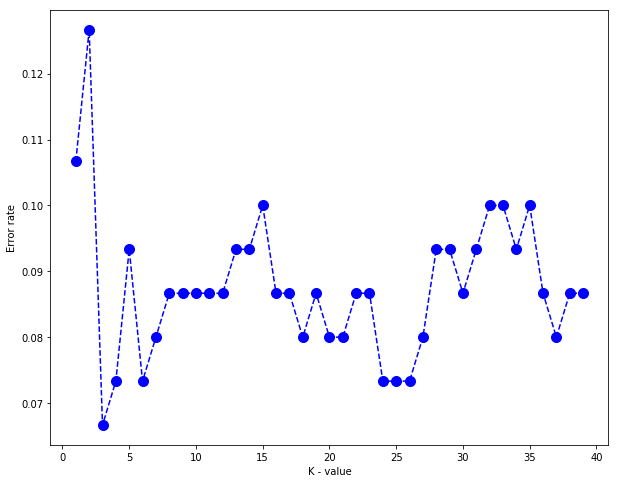

In [87]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markersize=10)
plt.ylabel('Error rate')
plt.xlabel('K - value')

In [88]:
## at a point where the error seems to be least we pick that k value, from above we see after k=23 its fluctating a lot.
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [89]:
print(classification_report(y_test,pred),"\n\nConfusion matrix: \n",confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        71
           1       0.90      0.94      0.92        79

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150
 

Confusion matrix: 
 [[63  8]
 [ 5 74]]
